# correction of the modulated binning 

This example shows how to correct the effect of "modulated" binning.  last update: 9/17 (2018)

In [1]:
import PyPlot
import DSP

In [2]:
include("../juwvid.jl")

juwvid

In [3]:
## Generating the modulated time bins (td) from the unifrom time bins (t)
nsample=4024;
dt=30.0/60/24
t=collect(1:nsample)*dt;

p=1.e-3 #modulation factor
wbin=1/5.0
td=t.+p*sin.(wbin*t);

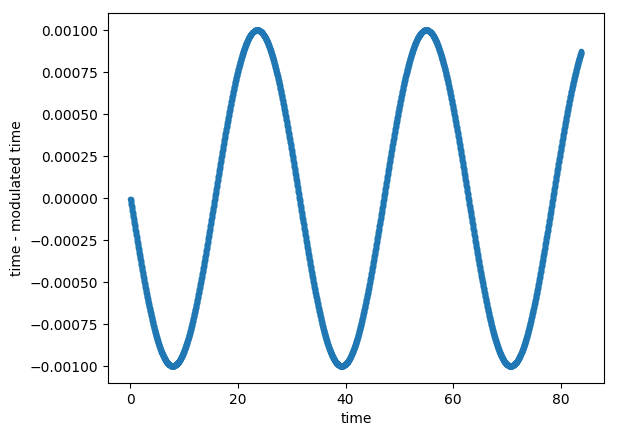

PyObject Text(0.5,24,'time')

In [4]:
PyPlot.plot(t,t-td,".")
PyPlot.ylabel("time - modulated time")
PyPlot.xlabel("time")

In [5]:
wp=2*pi
y=cos.(wp*td); # modulated signal
z=DSP.Util.hilbert(y);

yt=cos.(wp*t); # non-modulated signal for comparison
zt=DSP.Util.hilbert(yt);

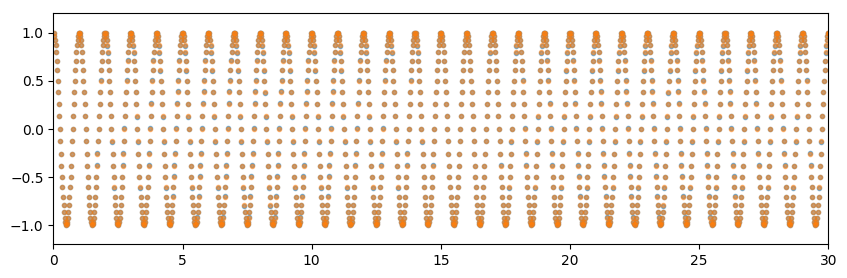

(-1.2, 1.2)

In [6]:
fig = PyPlot.figure(figsize=(10,3))
PyPlot.plot(td,y,".",alpha=0.5)
PyPlot.plot(td,yt,".",alpha=0.5)
PyPlot.xlim(0,30)
PyPlot.ylim(-1.2,1.2)

In [7]:
tfrpf=cohenclass.tfrpwv(z,NaN,NaN,NaN,NaN,NaN,0);

Single pseudo Wigner Ville
Use fft.


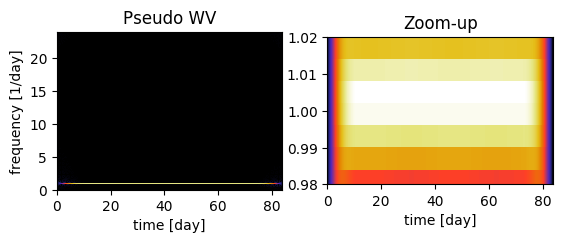

(0.98, 1.02)

In [8]:
fig=PyPlot.figure()
ax = fig[:add_subplot](1,2,1)
a=juwplot.tfrshow(abs.(tfrpf),td[2]-td[1],td[1],td[end],NaN,NaN,0.7,"CMRmap")
PyPlot.xlabel("time [day]")
PyPlot.ylabel("frequency [1/day]")
PyPlot.title("Pseudo WV")
ax = fig[:add_subplot](1,2,2)
a=juwplot.tfrshow(abs.(tfrpf),td[2]-td[1],td[1],td[end],NaN,NaN,0.7*560,"CMRmap")
PyPlot.xlabel("time [day]")
PyPlot.title("Zoom-up")
PyPlot.ylim(0.98,1.02)

In [9]:
nft=512

512

In [10]:
js,je=juwutils.frequency_to_index([0.999,1.001], td[2]-td[1], nsample, nft)

2-element Array{Float64,1}:
 167.532
 167.868

In [11]:
#check
juwutils.index_to_frequency([js,je],NaN,td[2]-td[1], nsample, nft, je,js)

2-element Array{Float64,1}:
 0.999
 1.001

In [12]:
nft=1024
fin=collect(linspace(js,je,nft));
tfrpfn=cohenclass.tfrpwv(z,NaN,NaN,fin,NaN,NaN,0,"nufft",16);
tfrpfnt=cohenclass.tfrpwv(zt,NaN,NaN,fin,NaN,NaN,0,"nufft",16);

Single pseudo Wigner Ville
Use nufft.
Single pseudo Wigner Ville
Use nufft.


In [13]:
indfn=extif.maxif(abs.(tfrpfn));
fn=juwutils.index_to_frequency(indfn,fin,t[2]-t[1],nsample,nft);
indfnt=extif.maxif(abs.(tfrpfnt));
fnt=juwutils.index_to_frequency(indfnt,fin,t[2]-t[1],nsample,nft);

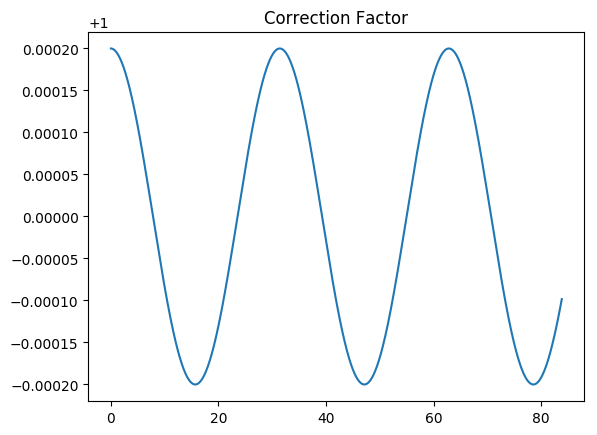

PyObject Text(0.5,1,'Correction Factor')

In [14]:
# computing teh correction factor
dtddt=Float64[]
for i=1:length(t)-1
    de=(td[i+1]-td[i])/dt
    #println(de)
    append!(dtddt,[de])
end

PyPlot.plot(t[1:end-1],dtddt)
PyPlot.title("Correction Factor")

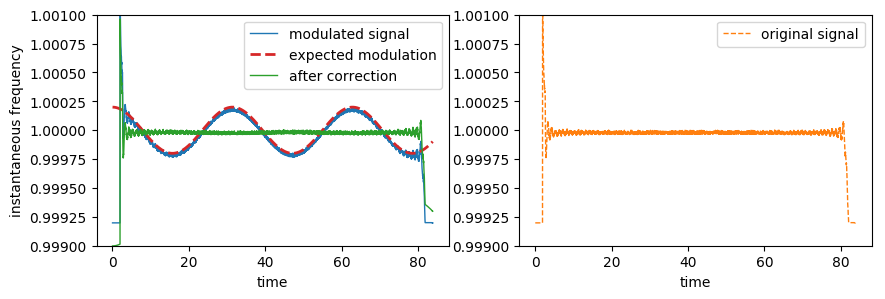

PyObject <matplotlib.legend.Legend object at 0x7f0ac934c978>

In [15]:
fig=PyPlot.figure(figsize=(10,3))
ax = fig[:add_subplot](1,2,1)
PyPlot.xlabel("time")
PyPlot.ylabel("instantaneous frequency")
PyPlot.ylim(0.999,1.001)
PyPlot.plot(td,fn, color="C0",lw=1)
PyPlot.plot(t[1:end-1],dtddt, color="C3",lw=2,ls="dashed")
PyPlot.plot(t[1:end-1],fn[1:end-1]./dtddt, color="C2",lw=1)
PyPlot.legend(["modulated signal","expected modulation","after correction"])

ax = fig[:add_subplot](1,2,2)
PyPlot.plot(t,fnt, color="C1",ls="dashed",lw=1)
PyPlot.xlabel("time")
#PyPlot.ylabel("instantaneous frequency")
PyPlot.ylim(0.999,1.001)
PyPlot.legend(["original signal"])